Say we're trying to optimize over an oblong cost function like the one below.

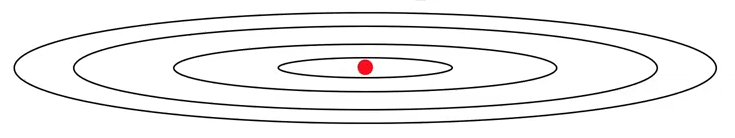

In [1]:
from IPython.display import Image

Image('images/momentum_1.png')

Traditionally, we know that there's a large emphasis on the learning rate, `alpha`, that dictates the step size of our gradient descent.

Too large, and we wind up over-shooting paths that would allow us to converge sooner (purple). Too small, and it takes forever to run (blue).

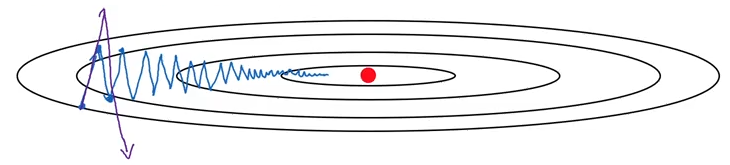

In [2]:
Image('images/momentum_2.png')

However, you look at these lines, they learn at a reasonable pace in the X plane, while oscillating back and forth in the Y.

## Momentum

By introducing a concept of "Momentum" we can continue to enjoy the horizontal descent rate, while deliberately dampening the variance in the Y.

### Pseudocode

We define `v_dW` and `v_db` terms to be "velocity" terms with the same shape as their gradient counterparts. And depending on our values for `beta` and `alpha`, we can tune how much momentum we want subsequent gradients to gather.

```
On iteration t:
    Compue dW, db for current mini-batch
    
    v_dW = beta * v_dW + (1 - beta) dW
    v_db = beta * v_db + (1 - beta) db
    
    W = W - alpha * v_dW
    b = b - alpha * v_db
```

If this form looks similar to [Exponentially Weighted Moving Averages](https://napsterinblue.github.io/notes/stats/techniques/ewma/), that's only because it is.

Note that because we're weighting successive gradient steps against one another, the `X` movement will reinforce, whereas the `Y` movement will have a cancelling-out effect.

## RMSprop

The Root Mean Squared propagation algorithm looks extremely similar to momentum approach we outlined above.

```
On iteration t:
    Compue dW, db for current mini-batch
    
    s_dW = beta * v_dW + (1 - beta) (dW ** 2)
    s_db = beta * v_db + (1 - beta) (db ** 2)
    
    W = W - alpha * (dW / (sqrt(s_dW) + epsilon))
    b = b - alpha * (db / (sqrt(s_db) + epsilon))
```

Key difference here is how we element-wise square the last term in our calculations of `s_dW` and `s_db`. This matters a ton because on the update step, we're *dividing by* the `s` coefficients (and adding a negligible `epsilon` coefficient so we don't run into divide-by-zero errors)

So intuitively:

- If `dW` is large
    - We square it, giving us a larger number in the denominator
    - This makes the whole learning rate coefficient *smaller*, so we make a smaller update
    - This is what we want to happen on our `Y` axis
- If `db` is small
    - Squaring it makes the number even smaller
    - Dividing by the square root of a smaller number makes for a much larger update coefficient-- a big step
    - This is what we want to happen on the `X` axis

Whereas the momentum approach ramps up after the model gains, well, momentum, this allows us to begin converging more quickly (green line) by correcting for a large gradient value right out of the gate.

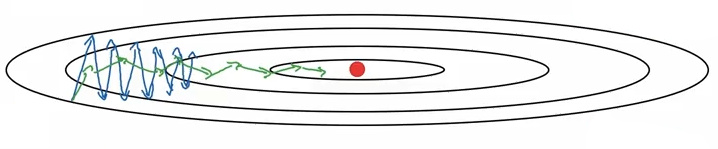

In [3]:
Image('images/momentum_3.png')

## Adam Optimization

The current de-facto optimization algorithm, Adam (Adaptive Moment Estimation) combines both Momentum and RMSprop into a mouthful of an update step, borrowing the best features of both to give you smoother cost functions as well as higher accuracy.

### Pseudocode

Note:

- We've got two separate `beta` coefficients-- one for each optimization part.
- We implement bias correction for each gradient (see bottom of [Exponentially Weighted Moving Averages](https://napsterinblue.github.io/notes/stats/techniques/ewma/) for explanation)

```
On iteration t:
    Compue dW, db for current mini-batch
    
    # Momentum
    v_dW = beta1 * v_dW + (1 - beta1) dW
    v_db = beta1 * v_db + (1 - beta1) db
    
    v_dW_corrected = v_dw / (1 - beta1 ** t)
    v_db_corrected = v_db / (1 - beta1 ** t)
    
    # RMSprop    
    s_dW = beta * v_dW + (1 - beta2) (dW ** 2)
    s_db = beta * v_db + (1 - beta2) (db ** 2)
    
    s_dW_corrected = s_dw / (1 - beta2 ** t)
    s_db_corrected = s_db / (1 - beta2 ** t)
   
    # Combine
    W = W - alpha * (v_dW_corrected / (sqrt(s_dW_corrected) + epsilon))
    b = b - alpha * (v_db_corrected / (sqrt(s_db_corrected) + epsilon))
```

### Coefficients

`alpha`: the learning rate. **Needs tuning.**

`beta1`: momentum weight. Default to `0.9`.

`beta2`: RMSprop weight. Default to `0.999`.

`epsilon`: Divide by Zero failsave. Default to `10 ** -8`.